<a href="https://colab.research.google.com/github/SANTIAGO13LOZANO/Code-Bias/blob/main/Base%20de%20Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import string

In [7]:
 # Descargar stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
stop_words = set(stopwords.words("english"))

In [13]:
df = pd.read_csv("scopus.csv")
df.head(10)

,Title,Source title,Link,Abstract,Index Keywords,Open Access
0,NeuroIGN: Explainable Multimodal Image-Guided ...,Journal of Medical Systems,https://www.scopus.com/inward/record.uri?eid=2...,Precise neurosurgical guidance is critical for...,Brain Neoplasms; Humans; Magnetic Resonance Im...,NaN
1,HPB3C-3PG algorithm: A new hybrid global optim...,Ecological Informatics,https://www.scopus.com/inward/record.uri?eid=2...,This paper proposes a hybrid bio-inspired sear...,algorithm; benchmarking; classification; data ...,All Open Access; Hybrid Gold Open Access
2,Health care providers acceptance of default pr...,BMC Health Services Research,https://www.scopus.com/inward/record.uri?eid=2...,Background: Tuberculosis (TB) preventive treat...,Health Personnel; HIV Infections; Humans; Mala...,All Open Access; Gold Open Access; Green Open ...
3,A von-Neumann-like photonic processor and its ...,Light: Science and Applications,https://www.scopus.com/inward/record.uri?eid=2...,Photonic quantum computation plays an importan...,Chaos theory; Phase space methods; Quantum com...,All Open Access; Gold Open Access
4,High-Performance Flow Classification of Big Da...,Tsinghua Science and Technology,https://www.scopus.com/inward/record.uri?eid=2...,The network switches in the data plane of Soft...,Application programming interfaces (API); Big ...,All Open Access; Bronze Open Access
5,Impact of quantum and neuromorphic computing o...,Current Opinion in Structural Biology,https://www.scopus.com/inward/record.uri?eid=2...,New high-performance computing architectures a...,algorithm; artificial intelligence; biological...,All Open Access; Hybrid Gold Open Access
6,Slideflow: deep learning for digital histopath...,BMC Bioinformatics,https://www.scopus.com/inward/record.uri?eid=2...,Deep learning methods have emerged as powerful...,"Computers; Deep Learning; Image Processing, Co...",All Open Access; Gold Open Access
7,CoCaSCOPE-Mesh Generator: A Tool to Generate 3...,IEEE Transactions on Applied Superconductivity,https://www.scopus.com/inward/record.uri?eid=2...,The next generation of high-field magnets for ...,Binary alloys; Computer software; Mesh generat...,NaN
8,Deep learning segmentation of peri-sinus struc...,Fluids and Barriers of the CNS,https://www.scopus.com/inward/record.uri?eid=2...,Background: Peri-sinus structures such as arac...,"Adolescent; Adult; Aged; Aged, 80 and over; Ch...",All Open Access; Gold Open Access
9,Vulnerability detection through machine learni...,Computers and Security,https://www.scopus.com/inward/record.uri?eid=2...,Modern software and networks underpin our digi...,Cybersecurity; Learning systems; Long short-te...,All Open Access; Hybrid Gold Open Access


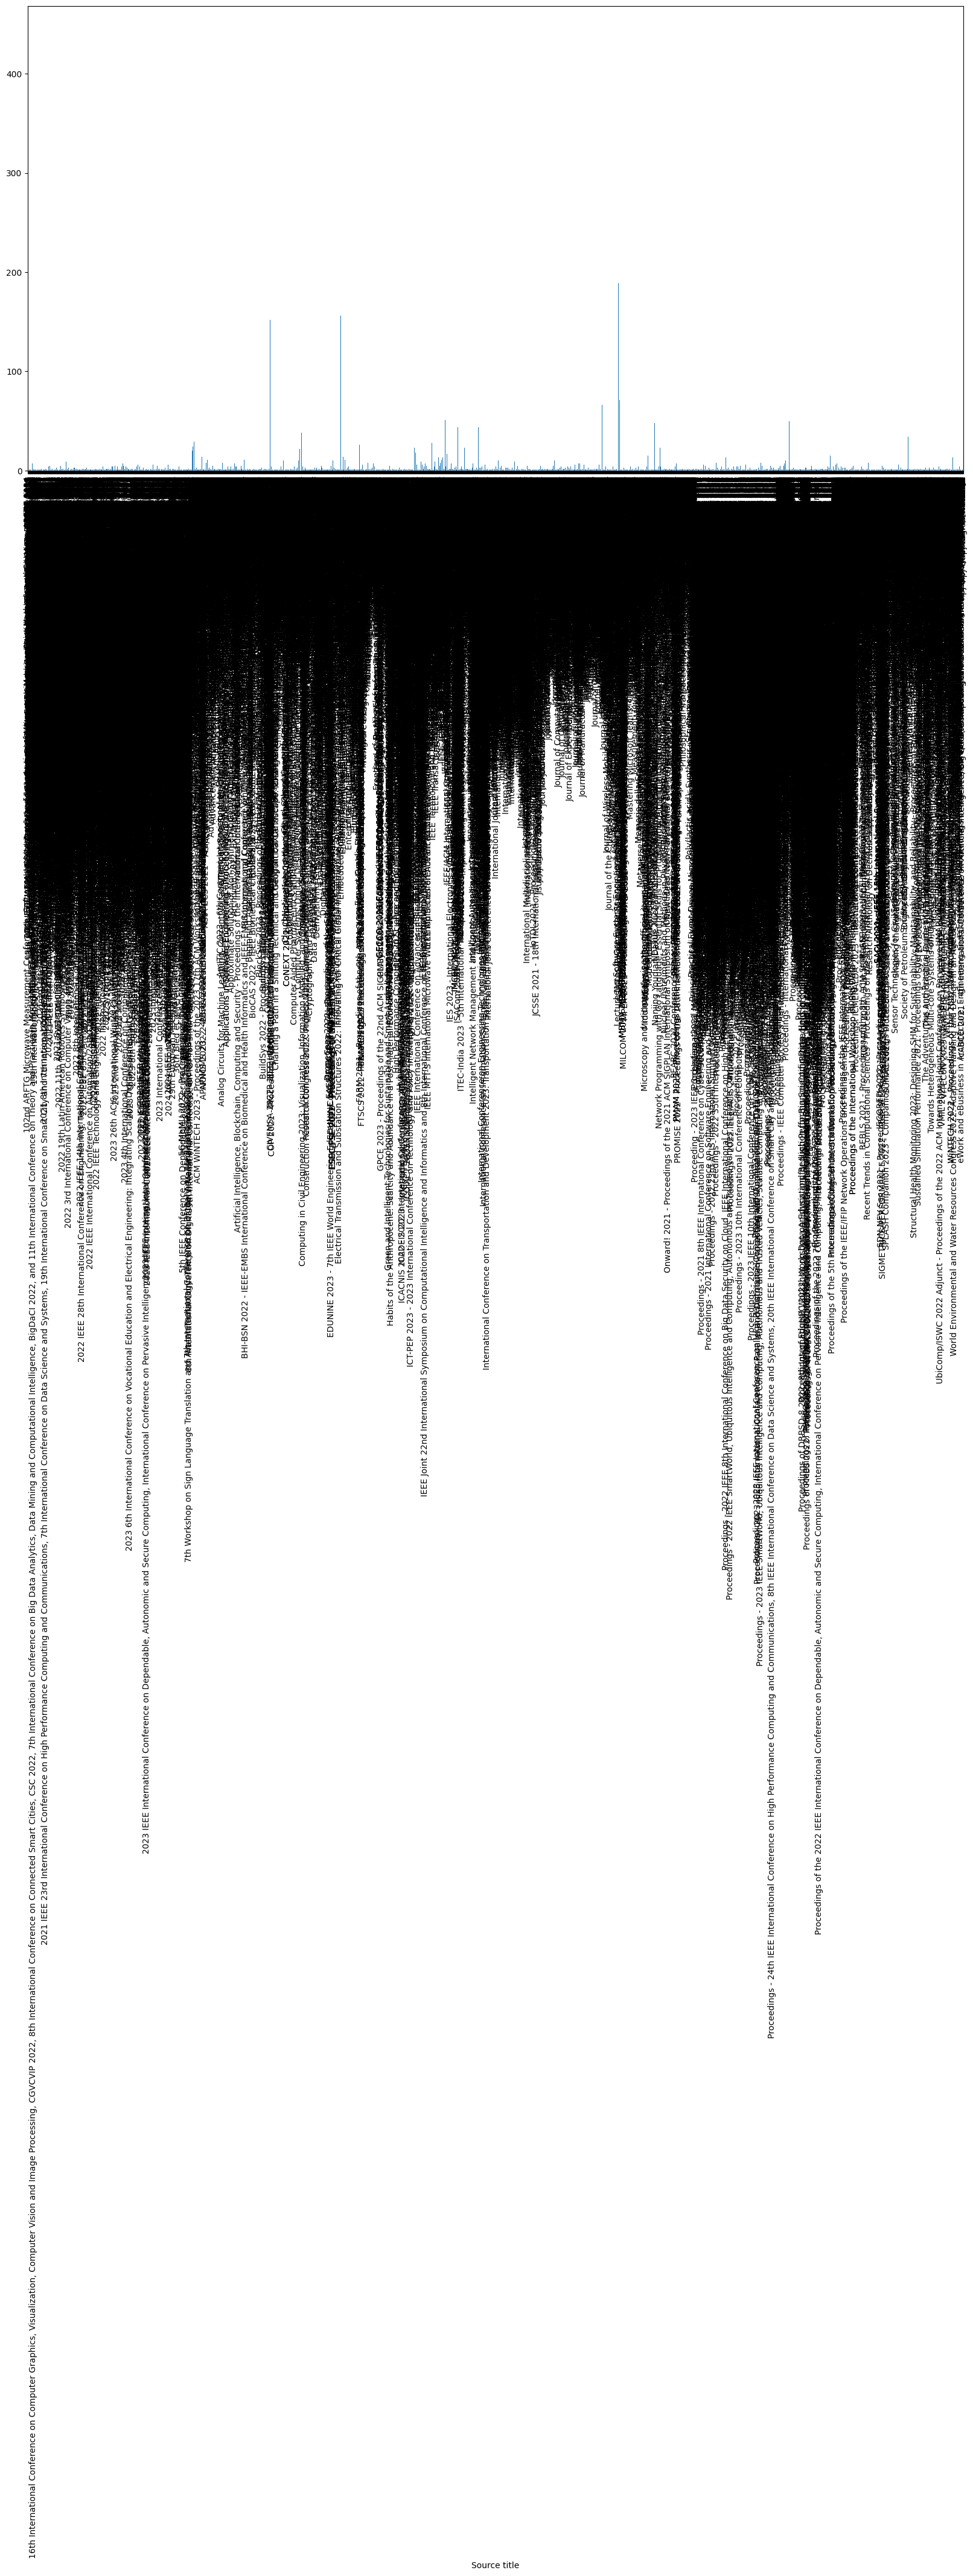

In [14]:
grouped = df.groupby('Source title')['Title'].count()
plt.figure(figsize=(20, 10))
grouped.plot(kind='bar')
plt.show()

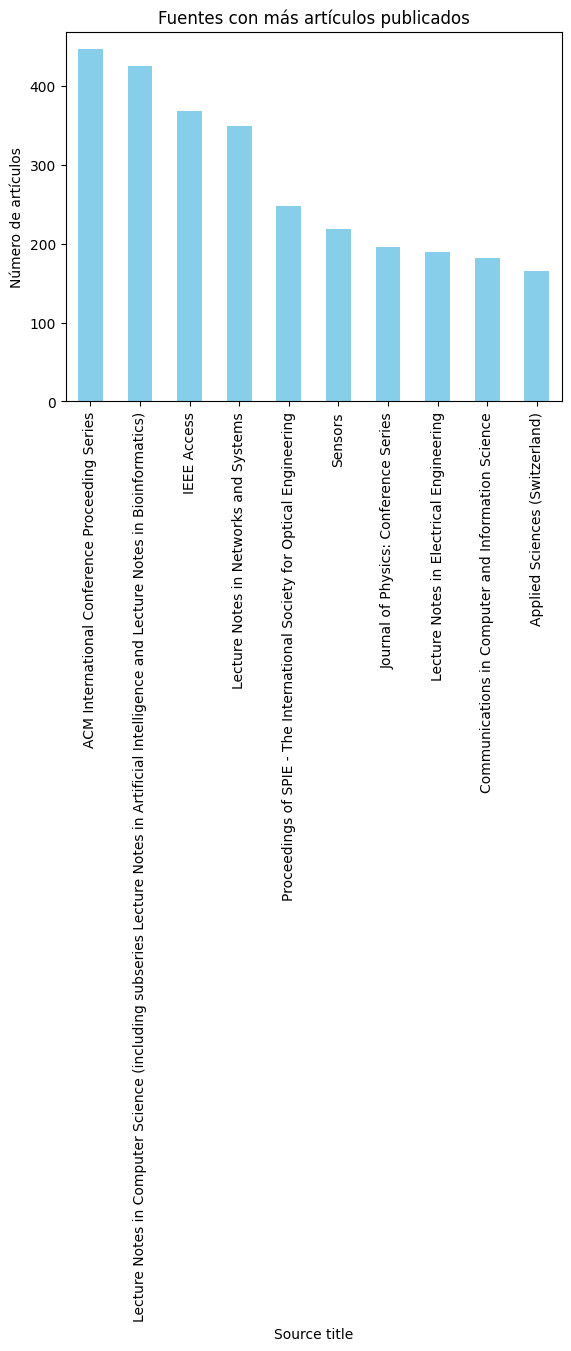

In [15]:
 grouped = df.groupby('Source title')['Title'].count().sort_values(ascending=False)
top_sources = grouped.head(10)
top_sources.plot(kind='bar', color='skyblue')
plt.title('Fuentes con más artículos publicados')
plt.xlabel('Source title')
plt.ylabel('Número de artículos')
plt.show()

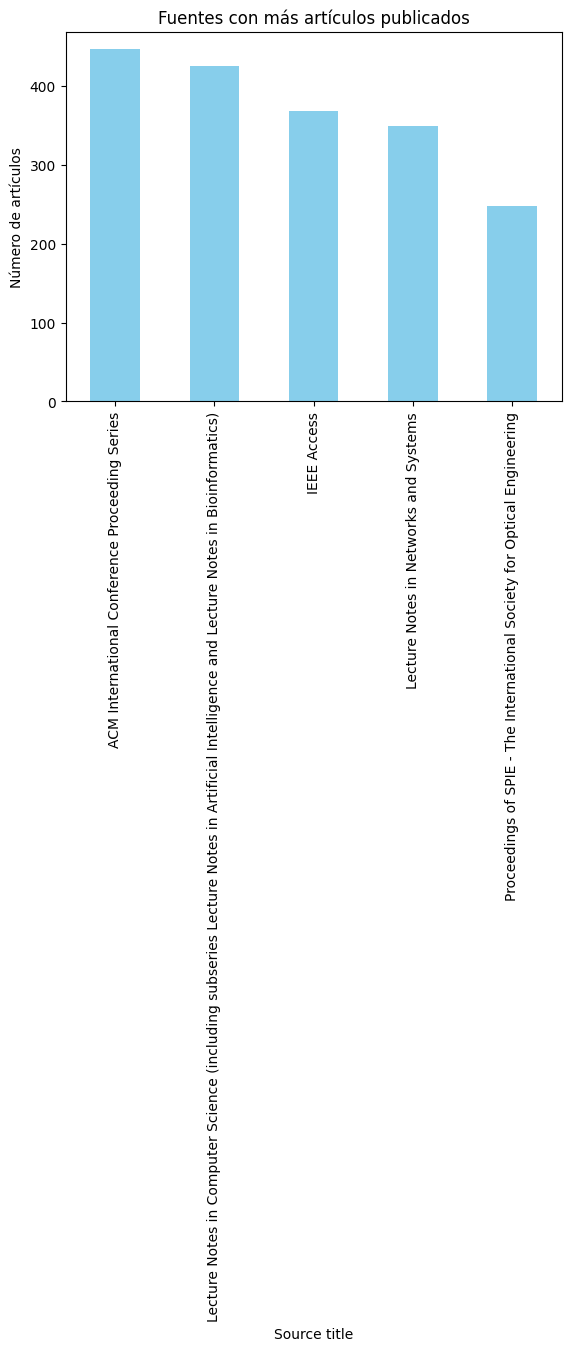

In [17]:
grouped = df.groupby('Source title')['Title'].count().sort_values(ascending=False)
top_sources = grouped.head(5)
top_sources.plot(kind='bar', color='skyblue')
plt.title('Fuentes con más artículos publicados')
plt.xlabel('Source title')
plt.ylabel('Número de artículos')
plt.show()

In [16]:
 # Función para limpiar y preparar texto
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return ' '.join([word for word in text.split() if word not in stop_words])

In [18]:
# Aplicar la limpieza de texto a los títulos
df['clean_title'] = df['Title'].apply(clean_text)

# Contar palabras en todos los títulos
word_counts = Counter()
df['clean_title'].str.split().apply(word_counts.update)

# Crear un DataFrame a partir del contador de palabras
word_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])

# Ordenar las palabras por frecuencia de aparición, de mayor a menor
word_df = word_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Añadir columna de rank
word_df['Rank'] = word_df['Frequency'].rank(method='dense', ascending=False)

# Mostrar el DataFrame de palabras ordenadas por rango
word_df.head(20)

,Word,Frequency,Rank
0,architecture,2906,1.0
1,based,2320,2.0
2,software,2284,3.0
3,system,2216,4.0
4,using,1923,5.0
5,design,1805,6.0
6,network,1459,7.0
7,learning,1395,8.0
8,data,1339,9.0
9,systems,1335,10.0


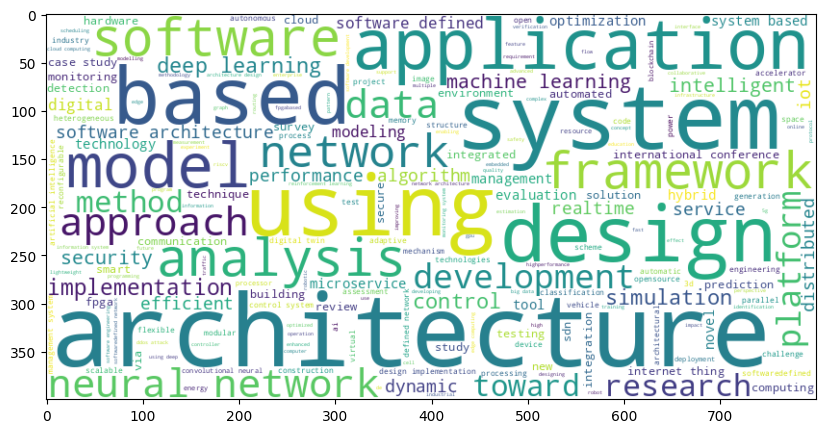

In [19]:
# Aplicar la limpieza de texto a los títulos
df['clean_title'] = df['Title'].apply(clean_text)

# Concatenar todos los títulos limpios en un solo texto
text = ' '.join(df['clean_title'])

wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('on')
plt.show()

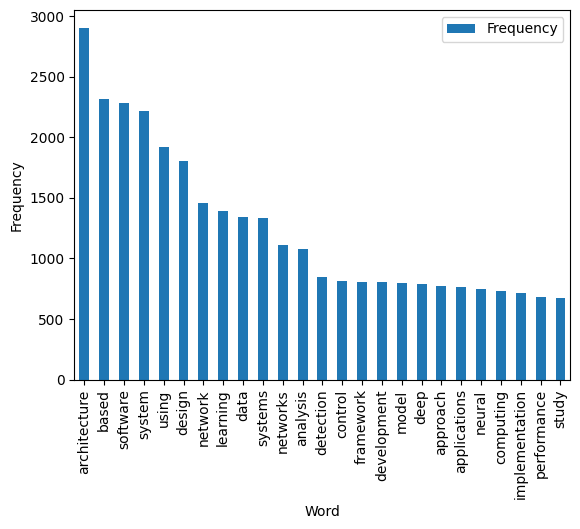

In [20]:
import matplotlib.pyplot as plt
word_df.sort_values(by='Frequency', ascending=False).head(25).plot(x='Word', y='Frequency', kind='bar')
plt.xlabel('Word')
_ = plt.ylabel('Frequency')

<ipython-input-28-765a3f0746bc>:27: UserWarning: Glyph 22522 (\N{CJK UNIFIED IDEOGRAPH-57FA}) missing from current font.
  plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama
<ipython-input-28-765a3f0746bc>:27: UserWarning: Glyph 20110 (\N{CJK UNIFIED IDEOGRAPH-4E8E}) missing from current font.
  plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama
<ipython-input-28-765a3f0746bc>:27: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama
<ipython-input-28-765a3f0746bc>:27: UserWarning: Glyph 26080 (\N{CJK UNIFIED IDEOGRAPH-65E0}) missing from current font.
  plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama
<ipython-input-28-765a3f0746bc>:27: UserWarning: Glyph 20154 (\N{CJK UNIFIED IDEOGRAPH-4EBA}) missing from current font.
  plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama
<ipython-i

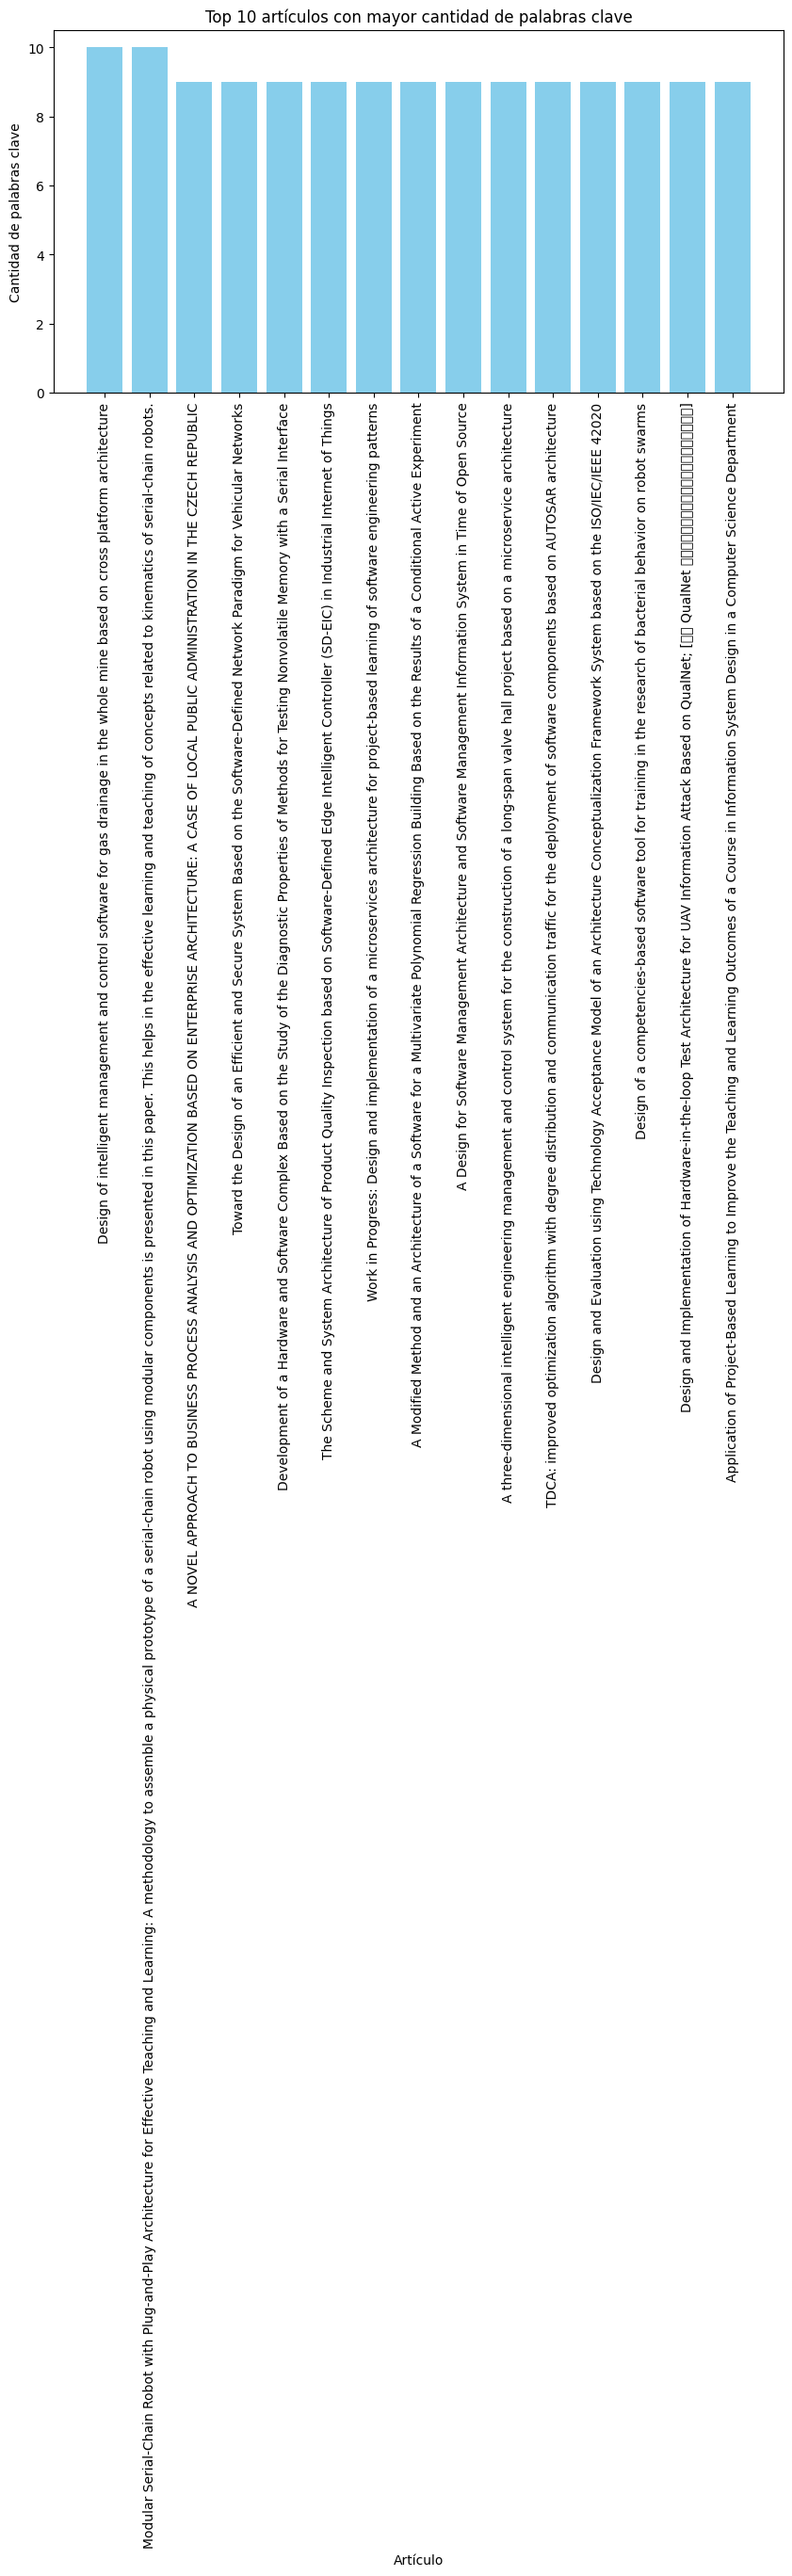

In [28]:
 # Contar palabras en todos los títulos
word_counts = Counter()
df['Title'].apply(lambda title: word_counts.update(clean_text(title)))

# Determinar un número de palabras clave a considerar (e.g., top 10)
num_keywords = 15
keywords = [word for word, count in word_counts.most_common(num_keywords)]

# Función para contar cuántas palabras clave contiene cada título
def count_keywords(title):
    words = clean_text(title)
    return sum(word in words for word in keywords)

# Contar las palabras clave por título
df['keyword_count'] = df['Title'].apply(count_keywords)

# Ordenar el DataFrame por 'keyword_count' de forma descendente
df_sorted = df.sort_values(by='keyword_count', ascending=False)

# Graficar los top 10 artículos con más palabras clave
plt.figure(figsize=(10, 5))
plt.bar(df_sorted['Title'].head(15), df_sorted['keyword_count'].head(15), color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Artículo')
plt.ylabel('Cantidad de palabras clave')
plt.title('Top 10 artículos con mayor cantidad de palabras clave')
plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama
plt.show()

In [30]:


# Seleccionar los abstracts de los artículos con más palabras clave
top_abstracts = df.sort_values(by='keyword_count', ascending=False).head(100)['Abstract']

# Función para resumir un abstract
def summarize_abstract(abstract):
    sentences = sent_tokenize(abstract)
    word_freq = FreqDist(clean_text(abstract))
    scores = {sentence: sum(word_freq[word] for word in word_tokenize(sentence.lower()) if word in word_freq) for sentence in sentences}
    summary_sentences = sorted(scores, key=scores.get, reverse=True)[:3]  # Tomar las 3 oraciones con mayor puntuación
    return ' '.join(summary_sentences)

# Aplicar la función de resumen a cada abstract seleccionado
top_abstracts_summary = top_abstracts.apply(summarize_abstract)

# Mostrar resúmenes
for i, summary in enumerate(top_abstracts_summary, 1):
    print(f"Resumen {i}:\n{summary}\n")

Resumen 1:
The field application results show that the software can meet the needs of the two level users of the group company and the mine, effectively improve the efficiency of the mine drainage, the ability of the mine in the evaluation of gas drainage, the disposal of abnormal drainage and the use of drainage, and reduce the probability of abnormal gas accidents in the mine  © 2023 IEEE. In case of abnormal drainage, the software can automatically link the broadcasting system to inform the evacuation personnel in the dangerous area of gas emission, and link the ventilation monitoring system to strengthen the ventilation in the abnormal area, and automatically push the abnormal alarm message to the relevant person in charge through the message push strategy, so as to quickly and timely solve the drainage problem. The existing coal mine gas drainage anomaly recognition needs to use manual assistance to view relevant data analysis, lacking of independent and intelligent analysis means

In [31]:
# Contar la aparición de palabras clave en cada título
df['keyword_count'] = df['Title'].apply(lambda x: sum(word in clean_text(x) for word in word_df))

# Seleccionar los abstracts de los artículos con más palabras clave
top_articles = df.sort_values(by='keyword_count', ascending=False).head(10)

# Función para resumir un abstract
def summarize_abstract(abstract):
    sentences = sent_tokenize(abstract)
    word_freq = FreqDist(clean_text(abstract))
    scores = {sentence: sum(word_freq[word] for word in word_tokenize(sentence.lower()) if word in word_freq) for sentence in sentences}
    summary_sentences = sorted(scores, key=scores.get, reverse=True)[:2]
    return ' '.join(summary_sentences)

# Aplicar la función de resumen a cada abstract seleccionado y almacenar junto con el título
top_articles['Summary'] = top_articles['Abstract'].apply(summarize_abstract)

# Mostrar títulos y resúmenes
for index, row in top_articles.iterrows():
    print(f"Title: {row['Title']}\nSummary: {row['Summary']}\n")

Title: NeuroIGN: Explainable Multimodal Image-Guided System for Precise Brain Tumor Surgery
Summary: In conclusion, this paper describes not only the development of an open-source multimodal IGN system but also demonstrates the innovative application of deep learning and explainable AI algorithms in enhancing neuronavigation for brain tumor surgeries. Experimental results demonstrated its accuracy in tumor segmentation and the success of ExplainAI in increasing the trust of medical professionals in deep learning.

Title: An Analog Nearest Class with Multiple Centroids Classifier Implementation, for Depth of Anesthesia Monitoring
Summary: To this end, this work proposes a novel, low power (1.7 μ W), low voltage (0.6V) analog architecture of a Nearest Class with Multiple Centroids classifier for depth of anesthesia monitoring. Monitoring the Depth of Anesthesia on a patient is crucial to maintain a safe sedation state during a surgical operation.

Title: Implementation of EIGRP Using Pac